<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

This project aims to identify the best- and worst-performing CA school districts on the ACT and SAT for 2019. The insights gleaned from this project will enable the state of California to not only direct resources to the districts in need, but also identify possible reasons for the disparities in performance.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
import random as r

In [2]:
# Code:
def get_mean(arr):
    return sum(arr) / len(arr)

nums = [r.randint(0, 100) for i in range(10)]

In [3]:
nums

[11, 97, 33, 100, 64, 6, 27, 49, 64, 14]

In [4]:
get_mean(nums)

46.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [5]:
# Code:
def std_dev(arr):
    try:
        return ( sum([(i - get_mean(arr)) ** 2 for i in arr]) / (len(arr))) ** .5
    except TypeError:
        return 'n/a'

In [6]:
std_dev(nums)

32.481533215043896

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [7]:
# Code:
def cleaner(string):
    return float(string[:-1]) / 100
cleaner('34.5%')

0.345

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [8]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

#### 1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.

In [9]:
sat = pd.read_csv('../data/sat_2019_ca.csv', na_values=['*'])
sat.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42.0,24.14,12.0,6.90,14.0,13.73,11.0,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97.0,35.27,37.0,13.45,18.0,15.93,35.0,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN


#### 2. Check for missing values.

In [10]:
sat.isna().sum()

CDS                         1
CCode                       1
CDCode                      1
SCode                       1
RType                       1
SName                     598
DName                      59
CName                       1
Enroll12                    1
NumTSTTakr12                1
NumERWBenchmark12         858
PctERWBenchmark12         858
NumMathBenchmark12        858
PctMathBenchmark12        858
Enroll11                    1
NumTSTTakr11                1
NumERWBenchmark11         844
PctERWBenchmark11         844
NumMathBenchmark11        844
PctMathBenchmark11        844
TotNumBothBenchmark12     858
PctBothBenchmark12        858
TotNumBothBenchmark11     844
PctBothBenchmark11        844
Year                        1
Unnamed: 25              2580
dtype: int64

#### 3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).

In [11]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      1722 non-null   float64
 11  PctERWBenchmark12      1722 non-null   float64
 12  NumMathBenchmark12     1722 non-null   float64
 13  PctMathBenchmark12     1722 non-null   float64
 14  Enroll11               2579 non-null   float64
 15  NumT

#### 4. Fix any errors you identified in steps 2-3.

In [12]:
sat.drop(columns=['RType', 'Year', 'Unnamed: 25'], inplace=True)
sat.head()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,...,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11
0,6.615981e+12,6.0,661598.0,630046.0,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,...,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.616061e+12,6.0,661606.0,634758.0,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,NaN,...,26.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31.0,...,219.0,174.0,42.0,24.14,12.0,6.90,14.0,13.73,11.0,6.32
3,1.964733e+13,19.0,1964733.0,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54.0,...,333.0,275.0,97.0,35.27,37.0,13.45,18.0,15.93,35.0,12.73
4,1.964733e+13,19.0,1964733.0,1931856.0,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,NaN,...,17.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
sat.dropna(axis=0, subset=['NumERWBenchmark12'], inplace=True)
sat.dropna(axis=0, subset=['NumERWBenchmark11'], inplace=True)
sat.isna().sum()

CDS                        0
CCode                      0
CDCode                     0
SCode                      0
SName                    440
DName                     54
CName                      0
Enroll12                   0
NumTSTTakr12               0
NumERWBenchmark12          0
PctERWBenchmark12          0
NumMathBenchmark12         0
PctMathBenchmark12         0
Enroll11                   0
NumTSTTakr11               0
NumERWBenchmark11          0
PctERWBenchmark11          0
NumMathBenchmark11         0
PctMathBenchmark11         0
TotNumBothBenchmark12      0
PctBothBenchmark12         0
TotNumBothBenchmark11      0
PctBothBenchmark11         0
dtype: int64

In [14]:
sat.head()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,...,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11
2,1.964733e+13,19.0,1964733.0,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31.0,...,219.0,174.0,42.0,24.14,12.0,6.90,14.0,13.73,11.0,6.32
3,1.964733e+13,19.0,1964733.0,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54.0,...,333.0,275.0,97.0,35.27,37.0,13.45,18.0,15.93,35.0,12.73
5,1.964734e+13,19.0,1964733.0,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68.0,...,187.0,183.0,91.0,49.73,47.0,25.68,36.0,33.96,44.0,24.04
6,3.073635e+13,30.0,3073635.0,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161.0,...,503.0,223.0,206.0,92.38,176.0,78.92,132.0,69.47,172.0,77.13
9,1.964733e+13,19.0,1964733.0,119685.0,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85.0,68.0,17.0,...,79.0,79.0,22.0,27.85,10.0,12.66,6.0,8.82,6.0,7.59


#### 5. Display the data types of each feature.

In [15]:
sat.dtypes

CDS                      float64
CCode                    float64
CDCode                   float64
SCode                    float64
SName                     object
DName                     object
CName                     object
Enroll12                 float64
NumTSTTakr12             float64
NumERWBenchmark12        float64
PctERWBenchmark12        float64
NumMathBenchmark12       float64
PctMathBenchmark12       float64
Enroll11                 float64
NumTSTTakr11             float64
NumERWBenchmark11        float64
PctERWBenchmark11        float64
NumMathBenchmark11       float64
PctMathBenchmark11       float64
TotNumBothBenchmark12    float64
PctBothBenchmark12       float64
TotNumBothBenchmark11    float64
PctBothBenchmark11       float64
dtype: object

#### 6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.

#### 7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.

In [16]:
sat.rename(columns={
    'CDS': 'uid_code',
    'CCode': 'county_code',
    'CDCode': 'district_code',
    'SCode': 'school_code',
    'SName': 'school_name',
    'DName': 'district_name',
    'CName': 'county_name',
    'Enroll12': 'enrolled_grade_12',
    'NumTSTTakr12': 'num_testers_grade_12',
    'PctERWBenchmark12': 'pct_erw_pass_12',
    'PctMathBenchmark12': 'pct_math_pass_12',
    'Enroll11': 'enrolled_grade_11',
    'NumTSTTakr11': 'num_testers_grade_11',
    'PctERWBenchmark11': 'pct_erw_pass_11',
    'PctMathBenchmark11': 'pct_math_pass_11',
    'PctBothBenchmark12': 'pct_both_pass_12',
    'PctBothBenchmark11': 'pct_both_pass_11'
}, inplace=True)

In [17]:
sat.drop(columns=['NumERWBenchmark12', 'NumMathBenchmark12', 'NumERWBenchmark11', 
                  'NumMathBenchmark11', 'TotNumBothBenchmark12', 'TotNumBothBenchmark11'], inplace=True)

In [18]:
sat.to_csv('../data/cali_sat.csv', index=False)

In [19]:
df = pd.read_csv('../data/act_2019_ca.csv', na_values=['*'])

In [20]:
df.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23.0,22.0,22.0,23.0,34.0,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21.0,20.0,23.0,22.0,11.0,57.89,2018-19,NaN


In [21]:
df.dropna(subset=['AvgScrRead'], inplace=True)
df.isna().sum()

CDS               0
CCode             0
CDCode            0
SCode           350
RType             0
SName           404
DName            54
CName             0
Enroll12          0
NumTstTakr        0
AvgScrRead        0
AvgScrEng         0
AvgScrMath        0
AvgScrSci         0
NumGE21           0
PctGE21           0
Year              0
Unnamed: 17    1421
dtype: int64

In [22]:
df.drop(columns=['AvgScrRead', 'AvgScrEng', 'AvgScrMath', 
                 'AvgScrSci', 'NumGE21', 'Year', 'Unnamed: 17'], inplace=True)

df.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,PctGE21
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,64.15
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,57.89
5,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,9.09
6,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,31.25
13,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,94.44


In [23]:
df.drop(columns=['RType'], inplace=True)
df.head()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTstTakr,PctGE21
3,4.369666e+13,43.0,4369666.0,4333795.0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,64.15
4,1.964733e+13,19.0,1964733.0,1935121.0,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,57.89
5,1.976968e+13,19.0,1976968.0,109926.0,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,9.09
6,1.964733e+13,19.0,1964733.0,126615.0,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,31.25
13,1.965136e+13,19.0,1965136.0,1996321.0,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,94.44


In [24]:
df.rename(columns={
    'CDS': 'uid_code',
    'CCode': 'county_code',
    'CDCode': 'district_code',
    'SCode': 'school_code',
    'SName': 'school_name',
    'DName': 'district_name',
    'CName': 'county_name',
    'Enroll12': 'num_enrolled_grade_12',
    'NumTstTakr': 'num_testers_grade_12',
    'PctGE21': 'pct_above_21_comp'
}, inplace=True)
df.head()

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,num_enrolled_grade_12,num_testers_grade_12,pct_above_21_comp
3,4.369666e+13,43.0,4369666.0,4333795.0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,64.15
4,1.964733e+13,19.0,1964733.0,1935121.0,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,57.89
5,1.976968e+13,19.0,1976968.0,109926.0,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,9.09
6,1.964733e+13,19.0,1964733.0,126615.0,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,31.25
13,1.965136e+13,19.0,1965136.0,1996321.0,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,94.44


In [25]:
df.to_csv('../data/cali_act.csv', index=False)

In [26]:
df = pd.read_csv('../data/cali_act.csv')
df.head()

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,num_enrolled_grade_12,num_testers_grade_12,pct_above_21_comp
0,4.369666e+13,43.0,4369666.0,4333795.0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,64.15
1,1.964733e+13,19.0,1964733.0,1935121.0,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,57.89
2,1.976968e+13,19.0,1976968.0,109926.0,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,9.09
3,1.964733e+13,19.0,1964733.0,126615.0,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,31.25
4,1.965136e+13,19.0,1965136.0,1996321.0,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,94.44


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**uid_code**|*float*|Cali ACT|A unique identifying code for each school, combining the county, district, and school codes.|
|**county_code**|*float*|Cali ACT|The county identifier|
|**district_code**|*float*|Cali ACT|The district identifier|  
|**school_code**|*float*|Cali ACT|The school identifier|
|**school_name**|*object*|Cali ACT|The name of the school. If the name is n/a, the record is from the district/county/state|
|**district_name**|*object*|Cali ACT|The name of the district. If the name is n/a, the record is from the county/state|
|**county_name**|*object*|Cali ACT|The name of the county.|
|**num_enrolled_grade_12**|*float*|Cali ACT|Number of students enrolled in grade 12|
|**num_testers_grade_12**|*float*|Cali ACT|Number of students in grade 12 who tested|
|**pct_above_21_comp**|*float*|Cali ACT|Percent of students who tested who achieved higher than a 21 composite score|
|**population**|*float*|Cali County Income|County population|
|**population_density**|*float*|Cali County Income|County population density|
|**median_household_income**|*float*|Cali County Income|County median household income|
|----------------------------|------|-------|----------------|
|**uid_code**|*float*|Cali SAT|A unique identifying code for each school, combining the county, district, and school codes.|
|**county_code**|*float*|Cali SAT|The county identifier|
|**district_code**|*float*|Cali SAT|The district identifier|  
|**school_code**|*float*|Cali SAT|The school identifier|
|**school_name**|*object*|Cali SAT|The name of the school. If the name is n/a, the record is from the district/county/state|
|**district_name**|*object*|Cali SAT|The name of the district. If the name is n/a, the record is from the county/state|
|**county_name**|*object*|Cali SAT|The name of the county.|
|**enrolled_grade_12**|*float*|Cali SAT|Number of students enrolled in grade 12|
|**num_testers_grade_12**|*float*|Cali SAT|Number of students in grade 12 who tested|
|**pct_erw_pass_12**|*float*|Cali SAT|Percent of students in grade 12 who took the SAT and achieved higher than 480 (College Board benchmark) in Evidence-based Reading and Writing|
|**pct_math_pass_12**|*float*|Cali SAT|Percent of students in grade 12 who took the SAT and achieved higher than 530 (College Board benchmark) in Math|
|**enrolled_grade_11**|*float*|Cali SAT|Number of students enrolled in grade 11|
|**num_testers_grade_11**|*float*|Cali SAT|Number of students in grade 11 who tested|
|**pct_erw_pass_11**|*float*|Cali SAT|Percent of students in grade 11 who took the SAT and achieved higher than 460 (College Board benchmark) in Evidence-based Reading and Writing|
|**pct_math_pass_11**|*float*|Cali SAT|Percent of students in grade 11 who took the SAT and achieved higher than 510 (College Board benchmark) in Math|
|**pct_both_pass_12**|*float*|Cali SAT|Percent of students grade 12 who passed both benchmarks (480 in ERW, 530 in Math)|
|**pct_both_pass_11**|*float*|Cali SAT|Percent of students grade 11 who passed both benchmarks (460 in ERW, 510 in Math)|
|**population**|*float*|Cali County Income|County population|
|**population_density**|*float*|Cali County Income|County population density|
|**median_household_income**|*float*|Cali County Income|County median household income|


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [27]:
df.describe().T.round(2)
act_nums = ['num_enrolled_grade_12', 'num_testers_grade_12', 'pct_above_21_comp']

In [28]:
sd_act = {name: round(std_dev(df[name]),2) for name in df.columns if name in act_nums}
sd_act


{'num_enrolled_grade_12': 13574.53,
 'num_testers_grade_12': 2310.78,
 'pct_above_21_comp': 25.57}

In [29]:
df2 = pd.read_csv('../data/cali_sat.csv')
df2.head()

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,enrolled_grade_12,num_testers_grade_12,pct_erw_pass_12,pct_math_pass_12,enrolled_grade_11,num_testers_grade_11,pct_erw_pass_11,pct_math_pass_11,pct_both_pass_12,pct_both_pass_11
0,1.964733e+13,19.0,1964733.0,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,30.39,13.73,219.0,174.0,24.14,6.90,13.73,6.32
1,1.964733e+13,19.0,1964733.0,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,47.79,15.93,333.0,275.0,35.27,13.45,15.93,12.73
2,1.964734e+13,19.0,1964733.0,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,64.15,33.96,187.0,183.0,49.73,25.68,33.96,24.04
3,3.073635e+13,30.0,3073635.0,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,84.74,72.63,503.0,223.0,92.38,78.92,69.47,77.13
4,1.964733e+13,19.0,1964733.0,119685.0,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85.0,68.0,25.00,8.82,79.0,79.0,27.85,12.66,8.82,7.59


In [30]:
sat_nums = [name for name in df2.columns[-10:]]
sd_sat = {name: round(std_dev(df2[name]),2) for name in df2.columns if name in sat_nums}
sd_sat

{'enrolled_grade_12': 12645.14,
 'num_testers_grade_12': 4468.34,
 'pct_erw_pass_12': 19.6,
 'pct_math_pass_12': 22.68,
 'enrolled_grade_11': 12265.11,
 'num_testers_grade_11': 5505.97,
 'pct_erw_pass_11': 20.88,
 'pct_math_pass_11': 26.16,
 'pct_both_pass_12': 22.72,
 'pct_both_pass_11': 26.36}

## These are the top ten districts based on percentage of ACT testers achieving above a 21 composite score for 2019

In [31]:
top_districts_act = df.groupby(['district_name', 'county_name'])['pct_above_21_comp'].mean().sort_values(ascending=False)
top_districts_act.head(10)


district_name                          county_name
Lakeside Union Elementary              San Diego      100.000
Los Gatos-Saratoga Joint Union High    Santa Clara     96.170
Piedmont City Unified                  Alameda         96.065
Santa Cruz County Office of Education  Santa Cruz      95.830
La Canada Unified                      Los Angeles     94.200
Oak Park Unified                       Ventura         93.855
Davis Joint Unified                    Yolo            93.350
Sierra Sands Unified                   Kern            93.330
Fremont Union High                     Santa Clara     92.910
Irvine Unified                         Orange          91.674
Name: pct_above_21_comp, dtype: float64

## These are the worst-performing ten districts based on percentage of ACT testers achieving above a 21 composite score for 2019

In [32]:
worst_districts_act = df.groupby(['district_name', 'county_name'])['pct_above_21_comp'].mean().sort_values(ascending=True)
worst_districts_act.head(10)

district_name                                                  county_name   
Golden Plains Unified                                          Fresno            0.00000
Reef-Sunset Unified                                            Kings             3.57000
Tulelake Basin Joint Unified                                   Modoc             6.67000
California School for the Deaf-Riverside (State Special Schl)  Riverside         7.69000
Washington Unified                                             Fresno            8.26000
Mendota Unified                                                Fresno            8.54000
Mojave Unified                                                 Kern              8.54500
Fontana Unified                                                San Bernardino    8.85875
SBE - Academia Avance Charter                                  Los Angeles       9.09000
California School for the Deaf-Fremont (State Special Schl)    Alameda           9.52000
Name: pct_above_21_comp, dtype: 

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## These are the top ten *counties* based on percentage of ACT testers achieving above a 21 composite score for 2019

In [33]:
top_counties_act = df.groupby(['county_name'])['pct_above_21_comp'].mean().sort_values(ascending=False)
top_counties_act.head(10)

county_name
Calaveras      85.173333
Mono           79.300000
Amador         78.970000
Tuolumne       78.260000
Marin          76.794545
Placer         75.232000
Shasta         74.837500
Nevada         74.695000
Trinity        73.330000
Santa Clara    70.945614
Name: pct_above_21_comp, dtype: float64

## These are the worst-performing ten *counties* based on percentage of ACT testers achieving above a 21 composite score for 2019

In [34]:
worst_counties_act = df.groupby(['county_name'])['pct_above_21_comp'].mean().sort_values(ascending=True)
worst_counties_act.head(10)

county_name
Modoc       16.668000
Merced      30.820526
Kings       30.920000
Tehama      31.995714
Colusa      32.373333
Lake        33.543333
Glenn       34.656000
Fresno      34.744146
Tulare      35.955600
Monterey    38.968182
Name: pct_above_21_comp, dtype: float64

## These are the top ten districts based on percentage of SAT testers in grade 12 passing both College Board benchmarks (480 in ERW, 530 in Math)

In [35]:
top_districts_sat = df2.groupby(['district_name', 'county_name'])['pct_both_pass_12'].mean().sort_values(ascending=False)
top_districts_sat.head(10)


district_name                        county_name
La Canada Unified                    Los Angeles    91.760000
San Marino Unified                   Los Angeles    91.670000
Los Gatos-Saratoga Joint Union High  Santa Clara    91.430000
Palo Alto Unified                    Santa Clara    90.466667
Oak Park Unified                     Ventura        87.965000
Irvine Unified                       Orange         87.924000
South Pasadena Unified               Los Angeles    87.850000
Manhattan Beach Unified              Los Angeles    87.320000
Fremont Union High                   Santa Clara    86.930000
Davis Joint Unified                  Yolo           85.020000
Name: pct_both_pass_12, dtype: float64

## These are the worst-performing ten districts based on percentage of SAT testers in grade 12 passing both College Board benchmarks (480 in ERW, 530 in Math)

In [36]:
worst_districts_sat = df2.groupby(['district_name', 'county_name'])['pct_both_pass_12'].mean().sort_values(ascending=True)
worst_districts_sat.head(10)


district_name                            county_name
Golden Plains Unified                    Fresno          0.000000
Williams Unified                         Colusa          0.000000
Firebaugh-Las Deltas Unified             Fresno          5.950000
McFarland Unified                        Kern            9.090000
Cloverdale Unified                       Sonoma          9.520000
Washington Unified                       Fresno          9.760000
San Pasqual Valley Unified               Imperial       10.530000
Farmersville Unified                     Tulare         10.645000
Paramount Unified                        Los Angeles    10.916667
SBE - The School of Arts and Enterprise  Los Angeles    11.590000
Name: pct_both_pass_12, dtype: float64

## These are the top ten *counties* based on percentage of SAT testers in grade 12 passing both College Board benchmarks (480 in ERW, 530 in Math)

In [37]:
top_counties_sat = df2.groupby(['county_name'])['pct_both_pass_12'].mean().sort_values(ascending=False)
top_counties_sat.head(10)

county_name
Nevada             74.874000
Mariposa           72.220000
Marin              68.747273
Tuolumne           67.922000
El Dorado          67.452500
Calaveras          66.658000
Placer             65.351364
Plumas             64.710000
Amador             64.583333
San Luis Obispo    63.050714
Name: pct_both_pass_12, dtype: float64

## These are the worst-performing ten *counties* based on percentage of SAT testers in grade 12 passing both College Board benchmarks (480 in ERW, 530 in Math)

In [38]:
worst_counties_sat = df2.groupby(['county_name'])['pct_both_pass_12'].mean().sort_values(ascending=True)
worst_counties_sat.head(10)

county_name
Colusa          9.500000
Merced         25.836190
Glenn          26.331429
Fresno         31.194151
Madera         31.521538
Tulare         31.748276
Kings          34.207500
Imperial       34.858571
Los Angeles    35.219398
Monterey       35.273913
Name: pct_both_pass_12, dtype: float64

## 3 worst performing counties on the SAT:

In [39]:
df2.loc[(df2.county_name == 'Colusa') | (df2.county_name == 'Merced') | (df2.county_name == 'Glenn')]

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,enrolled_grade_12,num_testers_grade_12,pct_erw_pass_12,pct_math_pass_12,enrolled_grade_11,num_testers_grade_11,pct_erw_pass_11,pct_math_pass_11,pct_both_pass_12,pct_both_pass_11
42,2.465755e+13,24.0,2465755.0,2434207.0,Los Banos High,Los Banos Unified,Merced,303.0,95.0,65.26,37.89,304.0,80.0,68.75,38.75,35.79,33.75
48,2.465789e+13,24.0,2465789.0,127373.0,El Capitan High,Merced Union High,Merced,373.0,142.0,64.08,32.39,388.0,106.0,76.42,53.77,30.99,53.77
49,2.465789e+13,24.0,2465789.0,2435204.0,Merced High,Merced Union High,Merced,400.0,110.0,70.91,42.73,417.0,79.0,68.35,51.90,39.09,48.10
111,2.465789e+13,24.0,2465789.0,2433605.0,Livingston High,Merced Union High,Merced,291.0,91.0,62.64,34.07,325.0,82.0,68.29,36.59,32.97,34.15
115,6.616141e+12,6.0,661614.0,635250.0,Pierce High,Pierce Joint Unified,Colusa,103.0,21.0,52.38,14.29,103.0,38.0,68.42,44.74,14.29,44.74
254,2.475317e+13,24.0,2475317.0,2431203.0,Dos Palos High,Dos Palos Oro Loma Joint Unified,Merced,159.0,43.0,51.16,20.93,149.0,30.0,76.67,66.67,16.28,63.33
255,2.475366e+13,24.0,2475366.0,2430114.0,Delhi High,Delhi Unified,Merced,167.0,82.0,60.98,17.07,169.0,59.0,67.80,22.03,17.07,22.03
288,2.465789e+13,24.0,2465789.0,2430601.0,Atwater High,Merced Union High,Merced,474.0,119.0,56.30,28.57,417.0,88.0,71.59,46.59,26.05,44.32
440,6.616221e+12,6.0,661622.0,637504.0,Williams Junior/Senior High,Williams Unified,Colusa,78.0,29.0,37.93,3.45,89.0,32.0,59.38,37.50,0.00,31.25
484,2.465755e+13,24.0,2465755.0,120923.0,Pacheco High,Los Banos Unified,Merced,418.0,120.0,60.00,25.83,445.0,37.0,89.19,67.57,24.17,67.57


limit_output extension: Maximum message size of 10000 exceeded with 14787 characters

## 3 worst performing counties on the ACT:

In [40]:
df.loc[(df.county_name == 'Modoc') | (df.county_name == 'Merced') | (df.county_name == 'Kings')].sort_values(by='county_name', ascending=False)

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,num_enrolled_grade_12,num_testers_grade_12,pct_above_21_comp
1330,2.573593e+13,25.0,2573593.0,4737250.0,Tulelake High,Tulelake Basin Joint Unified,Modoc,25.0,15.0,6.67
827,2.573593e+13,25.0,2573593.0,NaN,NaN,Tulelake Basin Joint Unified,Modoc,25.0,15.0,6.67
826,2.573585e+13,25.0,2573585.0,NaN,NaN,Modoc Joint Unified,Modoc,57.0,40.0,25.00
651,2.500000e+13,25.0,0.0,0.0,NaN,NaN,Modoc,87.0,55.0,20.00
594,2.573585e+13,25.0,2573585.0,2535409.0,Modoc High,Modoc Joint Unified,Modoc,55.0,40.0,25.00
569,2.465789e+13,24.0,2465789.0,2435204.0,Merced High,Merced Union High,Merced,400.0,52.0,42.31
1085,2.465755e+13,24.0,2465755.0,120923.0,Pacheco High,Los Banos Unified,Merced,418.0,39.0,43.59
825,2.475366e+13,24.0,2475366.0,NaN,NaN,Delhi Unified,Merced,167.0,68.0,22.06
824,2.473619e+13,24.0,2473619.0,NaN,NaN,Gustine Unified,Merced,155.0,28.0,28.57
823,2.465789e+13,24.0,2465789.0,NaN,NaN,Merced Union High,Merced,2577.0,379.0,30.87


limit_output extension: Maximum message size of 10000 exceeded with 10007 characters

## 3 worst districts on the ACT:

In [41]:
df.loc[(df.district_name == 'Golden Plains Unified') | (df.district_name == 'Reef-Sunset Unified') | (df.district_name == 'Tulelake Basin Joint Unified')].sort_values(by='district_name', ascending=False)

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,num_enrolled_grade_12,num_testers_grade_12,pct_above_21_comp
827,2.573593e+13,25.0,2573593.0,NaN,NaN,Tulelake Basin Joint Unified,Modoc,25.0,15.0,6.67
1330,2.573593e+13,25.0,2573593.0,4737250.0,Tulelake High,Tulelake Basin Joint Unified,Modoc,25.0,15.0,6.67
87,1.673932e+13,16.0,1673932.0,1630953.0,Avenal High,Reef-Sunset Unified,Kings,149.0,112.0,3.57
745,1.673932e+13,16.0,1673932.0,NaN,NaN,Reef-Sunset Unified,Kings,165.0,112.0,3.57
719,1.075234e+13,10.0,1075234.0,NaN,NaN,Golden Plains Unified,Fresno,125.0,19.0,0.00
1325,1.075234e+13,10.0,1075234.0,1037456.0,Tranquillity High,Golden Plains Unified,Fresno,120.0,19.0,0.00


## 3 worst districts on the SAT:

In [42]:
df2.loc[(df2.district_name == 'Golden Plains Unified') | (df2.district_name == 'Williams Unified') | (df2.district_name == 'Firebaugh-Las Deltas Unified')].sort_values(by='district_name', ascending=False)

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,enrolled_grade_12,num_testers_grade_12,pct_erw_pass_12,pct_math_pass_12,enrolled_grade_11,num_testers_grade_11,pct_erw_pass_11,pct_math_pass_11,pct_both_pass_12,pct_both_pass_11
440,6.616221e+12,6.0,661622.0,637504.0,Williams Junior/Senior High,Williams Unified,Colusa,78.0,29.0,37.93,3.45,89.0,32.0,59.38,37.50,0.00,31.25
1475,6.616220e+12,6.0,661622.0,0.0,NaN,Williams Unified,Colusa,87.0,29.0,37.93,3.45,98.0,32.0,59.38,37.50,0.00,31.25
34,1.075234e+13,10.0,1075234.0,1037456.0,Tranquillity High,Golden Plains Unified,Fresno,120.0,27.0,37.04,0.00,105.0,104.0,18.27,0.96,0.00,0.96
1296,1.075234e+13,10.0,1075234.0,0.0,NaN,Golden Plains Unified,Fresno,125.0,27.0,37.04,0.00,109.0,104.0,18.27,0.96,0.00,0.96
360,1.073809e+13,10.0,1073809.0,1030121.0,Firebaugh High,Firebaugh-Las Deltas Unified,Fresno,167.0,84.0,47.62,7.14,155.0,53.0,64.15,20.75,5.95,18.87
1529,1.073809e+13,10.0,1073809.0,0.0,NaN,Firebaugh-Las Deltas Unified,Fresno,170.0,84.0,47.62,7.14,159.0,53.0,64.15,20.75,5.95,18.87


In [43]:
income = pd.read_excel('../data/ca_county_income.xlsx')

In [44]:
income.drop(columns=['Unnamed: 4', 'Unnamed: 5'], inplace=True)
income.head()

,county,population,population_density,median_household_income
0,NaN,NaN,NaN,NaN
1,Alameda,1559308.0,2109.8,73775.0
2,Alpine,1202.0,1.6,61343.0
3,Amador,37159.0,62.5,52964.0
4,Butte,221578.0,135.4,43165.0


In [45]:
income.dropna(inplace=True)
income.head()

,county,population,population_density,median_household_income
1,Alameda,1559308.0,2109.8,73775.0
2,Alpine,1202.0,1.6,61343.0
3,Amador,37159.0,62.5,52964.0
4,Butte,221578.0,135.4,43165.0
5,Calaveras,44921.0,44.0,54936.0


In [46]:
income.rename(columns={'county': 'county_name'}, inplace=True)
income.head()

,county_name,population,population_density,median_household_income
1,Alameda,1559308.0,2109.8,73775.0
2,Alpine,1202.0,1.6,61343.0
3,Amador,37159.0,62.5,52964.0
4,Butte,221578.0,135.4,43165.0
5,Calaveras,44921.0,44.0,54936.0


In [47]:
df = pd.merge(df, income, on='county_name')


In [48]:
df2 = pd.merge(df2, income, on='county_name')
df2.head()

,uid_code,county_code,district_code,school_code,school_name,district_name,county_name,enrolled_grade_12,num_testers_grade_12,pct_erw_pass_12,pct_math_pass_12,enrolled_grade_11,num_testers_grade_11,pct_erw_pass_11,pct_math_pass_11,pct_both_pass_12,pct_both_pass_11,population,population_density,median_household_income
0,1.964733e+13,19.0,1964733.0,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,30.39,13.73,219.0,174.0,24.14,6.90,13.73,6.32,9974203.0,2457.9,55870.0
1,1.964733e+13,19.0,1964733.0,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,47.79,15.93,333.0,275.0,35.27,13.45,15.93,12.73,9974203.0,2457.9,55870.0
2,1.964734e+13,19.0,1964733.0,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,64.15,33.96,187.0,183.0,49.73,25.68,33.96,24.04,9974203.0,2457.9,55870.0
3,1.964733e+13,19.0,1964733.0,119685.0,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85.0,68.0,25.00,8.82,79.0,79.0,27.85,12.66,8.82,7.59,9974203.0,2457.9,55870.0
4,1.964634e+13,19.0,1964634.0,1996586.0,Animo Inglewood Charter High,Inglewood Unified,Los Angeles,145.0,68.0,66.18,44.12,163.0,122.0,59.02,29.51,42.65,29.51,9974203.0,2457.9,55870.0


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

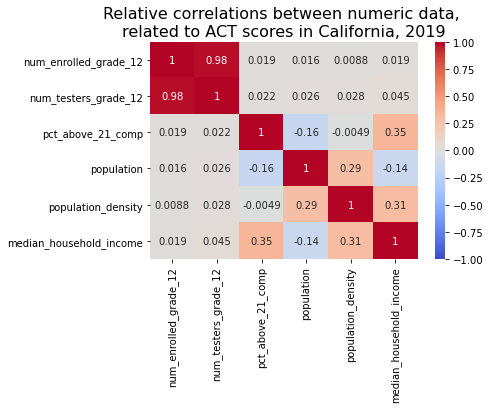

In [49]:
# Code
act_nums = df[['num_enrolled_grade_12', 'num_testers_grade_12', 'pct_above_21_comp', 'population', 'population_density', 'median_household_income']]
sns.heatmap(act_nums.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1);
plt.title('''Relative correlations between numeric data, 
related to ACT scores in California, 2019''', size=16);

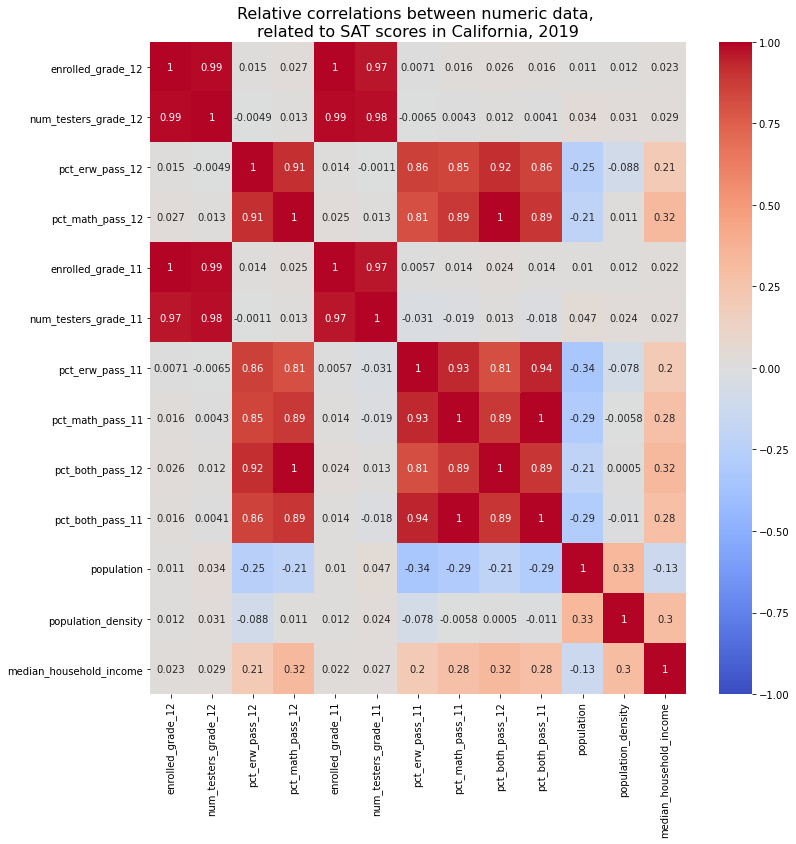

In [50]:
sat_nums = df2[[
    'enrolled_grade_12', 'num_testers_grade_12', 'pct_erw_pass_12',
    'pct_math_pass_12', 'enrolled_grade_11', 'num_testers_grade_11',
    'pct_erw_pass_11', 'pct_math_pass_11', 'pct_both_pass_12',
    'pct_both_pass_11', 'population', 'population_density', 'median_household_income'
]]
plt.figure(figsize=(12, 12))
sns.heatmap(sat_nums.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);
plt.title('''Relative correlations between numeric data, 
related to SAT scores in California, 2019''', size=16);

# No clear correlations between numbers of students or test-takers and performance on either test
# -
# Highest correlation on both tests is with median household income per county at .35 for the ACT and .32 for the SAT

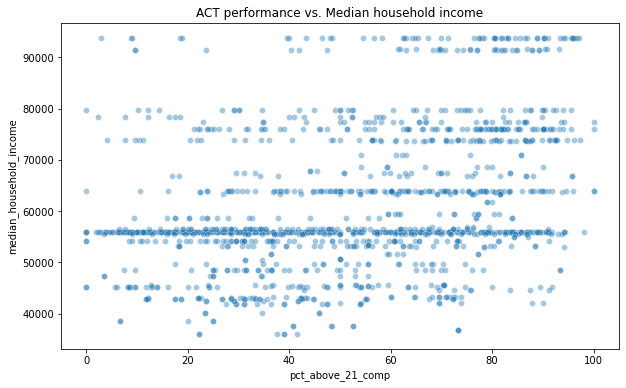

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='pct_above_21_comp', y='median_household_income', alpha=.4);
plt.title('ACT performance vs. Median household income');

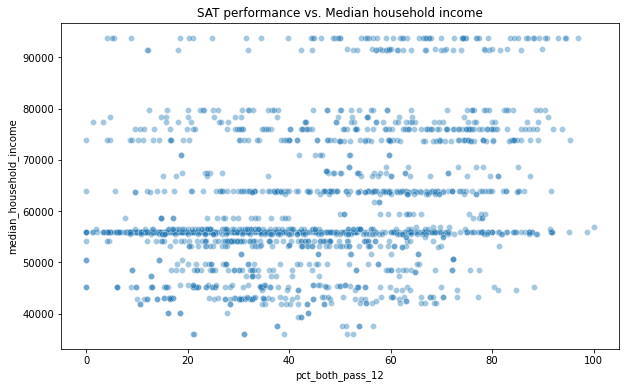

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='pct_both_pass_12', y='median_household_income', alpha=.4);
plt.title('SAT performance vs. Median household income');

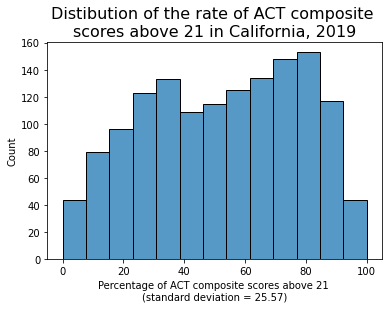

In [53]:
sns.histplot(df.pct_above_21_comp);
plt.title('''Distibution of the rate of ACT composite 
scores above 21 in California, 2019''', size=16);
plt.xlabel(f'''Percentage of ACT composite scores above 21 
(standard deviation = {sd_act['pct_above_21_comp']})''');

### We see a fairly normal, bimodal distribution, skewed slightly left

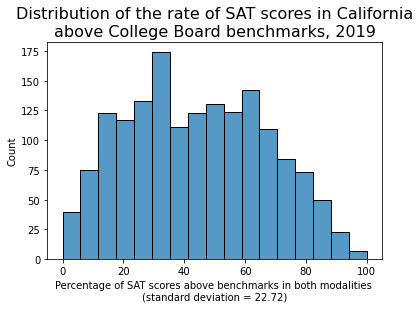

In [54]:
sns.histplot(df2.pct_both_pass_12)
plt.title('''Distribution of the rate of SAT scores in California
above College Board benchmarks, 2019''', size=16);
plt.xlabel(f'''Percentage of SAT scores above benchmarks in both modalities 
(standard deviation = {sd_sat['pct_both_pass_12']})''');

### And here we see another mostly normal distribution, also bimodal, this one skewed right slightly

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

## Based on my exploration of the data, I can conclude the following:
-
#### The three worst-performing counties on the ACT: 
|**County**|**Median Income**|**Percent ACT scores over 21**|
|-|-|-|
|Modoc|38,560|16.67|
|Merced|43,066|30.82|
|Kings|47,341|30.92|

#### The three worst-performing counties on the SAT: 
|**County**|**Median Income**|**Percent SAT scores over benchmarks**|
|-|-|-|
|Colusa|50,503|9.50|
|Merced|43,066|25.84|
|Glenn|40,106|26.33|

-
#### The three worst-performing districts on the ACT: 
|**District**|**County**|**Median Income**|**Percent ACT scores over 21**|
|-|-|-|-|
|Golden Plains Unified|Fresno|45,201|0.00|
|Reef-Sunset Unified|Kings|47,341|3.57|
|Tulelake Basin Joint Unified|Modoc|38,560|6.67|

#### The three worst-performing districts on the SAT: 
|**District**|**County**|**Median Income**|**Percent SAT scores over benchmarks**|
|-|-|-|-|
|Golden Plains Unified|Fresno|45,201|0.00|
|Williams Unified|Colusa|50,503|0.00|
|Firebaugh-Las Deltas Unified|Fresno|45,201|5.95|

-
#### The three best-performing counties on the ACT: 
|**County**|**Median Income**|**Percent ACT scores over 21**|
|-|-|-|
|Calaveras|54,936|85.17|
|Mono|61,814|79.30|
|Amador|52,964|78.97|

#### The three best-performing counties on the SAT: 
|**County**|**Median Income**|**Percent SAT scores over benchmark**|
|-|-|-|
|Nevada|56,949|74.87|
|Mariposa|50,560|72.22|
|Marin|91,529|68.74|

-
#### The three best-performing districts on the ACT: 
|**District**|**County**|**Median Income**|**Percent ACT scores over 21**|
|-|-|-|-|
|Lakeside Union Elementary|San Diego|63,996|100.00|
|Los Gatos-Saratoga Joint Union High|Santa Clara|93,854|96.17|
|Piedmont City Unified|Alameda|73,775|96.06|

#### The three best-performing districts on the SAT:
|**District**|**County**|**Median Income**|**Percent SAT scores over benchmarks**|
|-|-|-|-|
|La Canada Unified|Los Angeles|55,870|91.76|
|San Marino Unified|Los Angeles|55,870|91.67|
|Los Gatos-Saratoga Joint Union High|Santa Clara|93,854|91.43|

### Our analysis has identified the most and least successful counties and districts. We have discovered that there are no meaningful correlations with test success and any other data point, save household income. The correlation between median household income and success on these tests was (~34%).

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!